Perform 1d linear regression on some toy data, and its rank-transformed version.
Code is from
https://www.georgeho.org/tests-as-linear/

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import patsy
import scipy
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [7]:
try:
    from probml_utils import savefig, latexify
except ModuleNotFoundError:
    %pip install -qq git+https://github.com/probml/probml-utils.git
    from probml_utils import savefig, latexify

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 88 kB 2.3 MB/s 
     |████████████████████████████████| 132 kB 30.2 MB/s 
     |████████████████████████████████| 272 kB 60.2 MB/s 
     |████████████████████████████████| 85 kB 3.9 MB/s 
     |████████████████████████████████| 121 kB 64.0 MB/s 
     |████████████████████████████████| 1.6 MB 61.4 MB/s 
     |████████████████████████████████| 83 kB 2.3 MB/s 
     |████████████████████████████████| 1.1 MB 62.3 MB/s 


In [ ]:

import os

os.environ['FIG_DIR']='/Users/kpmurphy/github/bookv2/figures'
os.environ['LATEXIFY']='1'

latexify(fig_height = 1.5)


In [5]:
def format_decimals_factory(num_decimals=1):
    return lambda x: "{1:.{0}f}".format(num_decimals, x)

def pearson_spearman_plot():
    # Construct data as pd.DataFrames
    x = np.random.normal(0, 2, 30)
    y = 0.8 * x + 0.2 * 5 * np.random.randn(30)
    data_pearson = pd.DataFrame()
    data_pearson["x"], data_pearson["y"] = x, y
    data_spearman = data_pearson.rank()

    # Pearson equivalent linear model
    res_pearson = smf.ols("y ~ 1 + x", data_pearson).fit()
    intercept_pearson, slope_pearson = res_pearson.params
    print('pearson params', res_pearson.params)

    # Spearman equivalent linear model
    res_spearman = smf.ols("y ~ 1 + x", data_spearman).fit()
    intercept_spearman, slope_spearman = res_spearman.params
    print('spearman params', res_spearman.params)

    # Plot
    fig, axarr = plt.subplots(ncols=2, figsize=[18, 8])

    for ax, dataset, to_str, title, a, b in zip(
        axarr,
        [data_pearson, data_spearman],
        [format_decimals_factory(), format_decimals_factory(0)],
        ["Pearson", "Spearman"],
        [slope_pearson, slope_spearman],
        [intercept_pearson, intercept_spearman],
    ):
        ax.scatter(dataset["x"], dataset["y"], color="k")

        annotations = (
            "(" + dataset["x"].apply(to_str) + ", " + dataset["y"].apply(to_str) + ")"
        )
        for i, annot in enumerate(annotations):
            ax.annotate(annot, (dataset["x"][i], dataset["y"][i]), color="k")

        ax.axhline(a, color="b", label=r"$\beta_0$ (Intercept)")
        ax.plot(
            ax.get_xlim(),
            [a * x + b for x in ax.get_xlim()],
            color="r",
            label=r"$\beta_1$ (Slope)",
        )

        ax.set_title(title)
        ax.legend(fontsize="large")

    return fig, ax

pearson params Intercept    0.044719
x            0.966266
dtype: float64
spearman params Intercept    3.537931
x            0.771746
dtype: float64


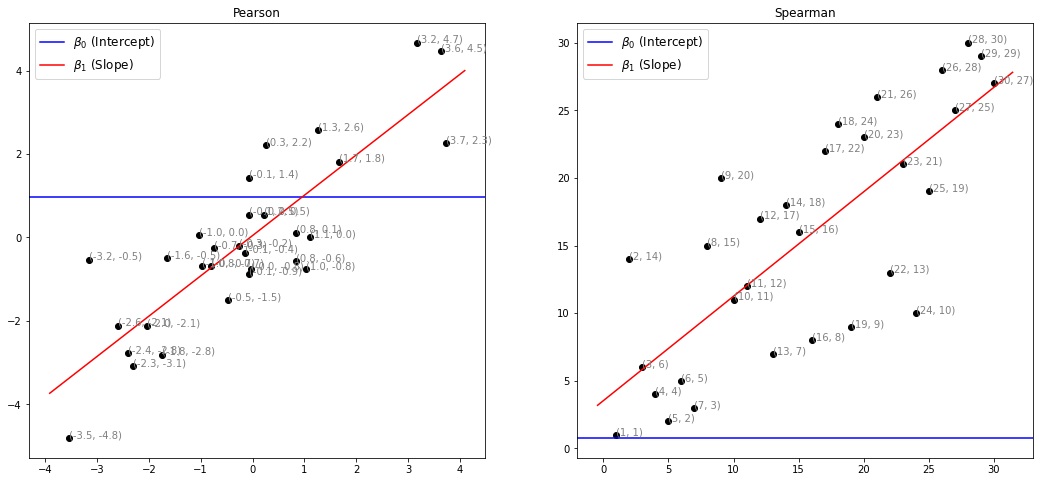

In [6]:
np.random.seed(1618)
fig, ax = pearson_spearman_plot()

plt.tight_layout()
savefig("linreg_rank_stats")

plt.savefig('linreg_pearson_spearman.pdf')
plt.show()